In [1]:
#!pip install tensorflow-macos
#!pip install tensorflow-metal

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Preparing Data

In [3]:
data = pd.read_csv("DNN_data.csv", parse_dates = ["time"], index_col = "time")
data

,EUR_USD
time,
2017-01-02 23:20:00,1.04574
2017-01-02 23:40:00,1.04608
2017-01-03 00:00:00,1.04575
2017-01-03 00:20:00,1.04672
2017-01-03 00:40:00,1.04696
...,...
2019-12-30 23:00:00,1.12012
2019-12-30 23:20:00,1.12030
2019-12-30 23:40:00,1.12018


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 55785 entries, 2017-01-02 23:20:00 to 2019-12-31 00:20:00
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   EUR_USD  55785 non-null  float64
dtypes: float64(1)
memory usage: 871.6 KB


In [5]:
symbol = data.columns[0]
symbol

'EUR_USD'

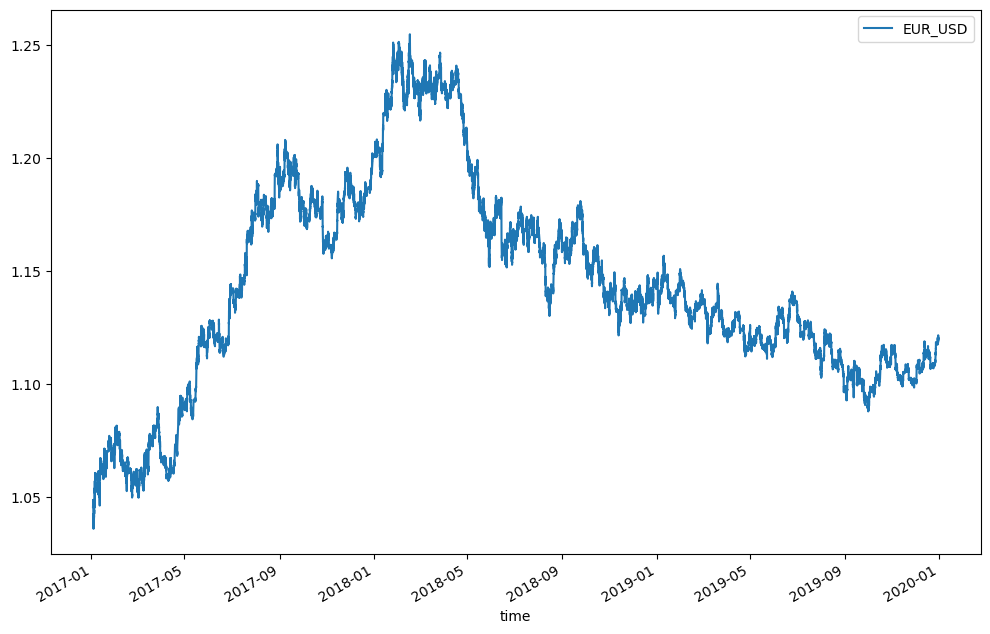

In [6]:
data.plot(figsize = (12,8))
plt.show()

In [7]:
data["returns"] = np.log(data[symbol] / data[symbol].shift())
data

,EUR_USD,returns
time,,
2017-01-02 23:20:00,1.04574,NaN
2017-01-02 23:40:00,1.04608,0.000325
2017-01-03 00:00:00,1.04575,-0.000316
2017-01-03 00:20:00,1.04672,0.000927
2017-01-03 00:40:00,1.04696,0.000229
...,...,...
2019-12-30 23:00:00,1.12012,0.000080
2019-12-30 23:20:00,1.12030,0.000161
2019-12-30 23:40:00,1.12018,-0.000107


In [8]:
window = 50

In [9]:
df = data.copy()
df["dir"] = np.where(df["returns"] > 0, 1, 0)
df["sma"] = df[symbol].rolling(window).mean() - df[symbol].rolling(150).mean()
df["boll"] = (df[symbol] - df[symbol].rolling(window).mean() / df[symbol].rolling(window).std())
df["min"] = df[symbol].rolling(window).min() / df[symbol] - 1
df["max"] = df[symbol].rolling(window).max() / df[symbol] - 1
df["mom"] = df["returns"].rolling(3).mean()
df["vol"] = df["returns"].rolling(window).std()
df.dropna(inplace = True)
df

,EUR_USD,returns,dir,sma,boll,min,max,mom,vol
time,,,,,,,,,
2017-01-05 01:00:00,1.05406,0.001728,1,0.002748,-385.602715,-0.010948,0.000000,1.384831e-03,0.000803
2017-01-05 01:20:00,1.05226,-0.001709,0,0.002899,-378.033028,-0.009047,0.001711,-1.013537e-04,0.000841
2017-01-05 01:40:00,1.05138,-0.000837,0,0.003024,-373.600391,-0.008218,0.002549,-2.725461e-04,0.000848
2017-01-05 02:00:00,1.05196,0.000552,1,0.003139,-365.792598,-0.008765,0.001996,-6.647612e-04,0.000847
2017-01-05 02:20:00,1.05230,0.000323,1,0.003266,-358.030419,-0.009085,0.001673,1.267090e-05,0.000847
...,...,...,...,...,...,...,...,...,...
2019-12-30 23:00:00,1.12012,0.000080,1,0.003163,-1517.495789,-0.001357,0.001446,5.952275e-05,0.000407
2019-12-30 23:20:00,1.12030,0.000161,1,0.003116,-1532.997475,-0.001517,0.001285,-2.975261e-05,0.000396
2019-12-30 23:40:00,1.12018,-0.000107,0,0.003058,-1539.432845,-0.001410,0.001393,4.463867e-05,0.000395


In [10]:
lags = 5

In [11]:
cols = []
features = ["dir", "sma", "boll", "min", "max", "mom", "vol"]

In [12]:
for f in features:
    for lag in range(1, lags + 1):
        col = "{}_lag_{}".format(f, lag)
        df[col] = df[f].shift(lag)
        cols.append(col)
df.dropna(inplace = True)

In [13]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 55631 entries, 2017-01-05 02:40:00 to 2019-12-31 00:20:00
Data columns (total 44 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   EUR_USD     55631 non-null  float64
 1   returns     55631 non-null  float64
 2   dir         55631 non-null  int64  
 3   sma         55631 non-null  float64
 4   boll        55631 non-null  float64
 5   min         55631 non-null  float64
 6   max         55631 non-null  float64
 7   mom         55631 non-null  float64
 8   vol         55631 non-null  float64
 9   dir_lag_1   55631 non-null  float64
 10  dir_lag_2   55631 non-null  float64
 11  dir_lag_3   55631 non-null  float64
 12  dir_lag_4   55631 non-null  float64
 13  dir_lag_5   55631 non-null  float64
 14  sma_lag_1   55631 non-null  float64
 15  sma_lag_2   55631 non-null  float64
 16  sma_lag_3   55631 non-null  float64
 17  sma_lag_4   55631 non-null  float64
 18  sma_lag_5   55631 non-null  flo

,EUR_USD,returns,dir,sma,boll,min,max,mom,vol,dir_lag_1,...,mom_lag_1,mom_lag_2,mom_lag_3,mom_lag_4,mom_lag_5,vol_lag_1,vol_lag_2,vol_lag_3,vol_lag_4,vol_lag_5
time,,,,,,,,,,,,,,,,,,,,,
2017-01-05 02:40:00,1.05124,-0.001008,0,0.003386,-356.568912,-0.008086,0.002683,-4.438906e-05,0.000860,1.0,...,1.267090e-05,-6.647612e-04,-0.000273,-0.000101,0.001385,0.000847,0.000847,0.000848,0.000841,0.000803
2017-01-05 03:00:00,1.05150,0.000247,1,0.003512,-356.052591,-0.008331,0.002435,-1.457915e-04,0.000859,0.0,...,-4.438906e-05,1.267090e-05,-0.000665,-0.000273,-0.000101,0.000860,0.000847,0.000847,0.000848,0.000841
2017-01-05 03:20:00,1.05230,0.000761,1,0.003652,-353.374881,-0.009085,0.001673,-1.362481e-17,0.000863,1.0,...,-1.457915e-04,-4.438906e-05,0.000013,-0.000665,-0.000273,0.000859,0.000860,0.000847,0.000847,0.000848
2017-01-05 03:40:00,1.05192,-0.000361,0,0.003799,-354.870311,-0.008727,0.002034,2.155487e-04,0.000862,1.0,...,-1.362481e-17,-1.457915e-04,-0.000044,0.000013,-0.000665,0.000863,0.000859,0.000860,0.000847,0.000847
2017-01-05 04:00:00,1.05204,0.000114,1,0.003922,-353.186736,-0.008840,0.001920,1.711401e-04,0.000852,0.0,...,2.155487e-04,-1.362481e-17,-0.000146,-0.000044,0.000013,0.000862,0.000863,0.000859,0.000860,0.000847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-30 23:00:00,1.12012,0.000080,1,0.003163,-1517.495789,-0.001357,0.001446,5.952275e-05,0.000407,0.0,...,-6.844352e-05,6.545924e-05,0.000021,0.000104,0.000098,0.000408,0.000406,0.000402,0.000401,0.000402
2019-12-30 23:20:00,1.12030,0.000161,1,0.003116,-1532.997475,-0.001517,0.001285,-2.975261e-05,0.000396,1.0,...,5.952275e-05,-6.844352e-05,0.000065,0.000021,0.000104,0.000407,0.000408,0.000406,0.000402,0.000401
2019-12-30 23:40:00,1.12018,-0.000107,0,0.003058,-1539.432845,-0.001410,0.001393,4.463867e-05,0.000395,1.0,...,-2.975261e-05,5.952275e-05,-0.000068,0.000065,0.000021,0.000396,0.000407,0.000408,0.000406,0.000402


In [14]:
len(cols)

35

# Train-Test Split

In [15]:
len(df)

55631

In [16]:
split = int(len(df)*0.66)
split

36716

In [17]:
train = df.iloc[:split].copy()
train

,EUR_USD,returns,dir,sma,boll,min,max,mom,vol,dir_lag_1,...,mom_lag_1,mom_lag_2,mom_lag_3,mom_lag_4,mom_lag_5,vol_lag_1,vol_lag_2,vol_lag_3,vol_lag_4,vol_lag_5
time,,,,,,,,,,,,,,,,,,,,,
2017-01-05 02:40:00,1.05124,-0.001008,0,0.003386,-356.568912,-0.008086,0.002683,-4.438906e-05,0.000860,1.0,...,1.267090e-05,-6.647612e-04,-0.000273,-0.000101,0.001385,0.000847,0.000847,0.000848,0.000841,0.000803
2017-01-05 03:00:00,1.05150,0.000247,1,0.003512,-356.052591,-0.008331,0.002435,-1.457915e-04,0.000859,0.0,...,-4.438906e-05,1.267090e-05,-0.000665,-0.000273,-0.000101,0.000860,0.000847,0.000847,0.000848,0.000841
2017-01-05 03:20:00,1.05230,0.000761,1,0.003652,-353.374881,-0.009085,0.001673,-1.362481e-17,0.000863,1.0,...,-1.457915e-04,-4.438906e-05,0.000013,-0.000665,-0.000273,0.000859,0.000860,0.000847,0.000847,0.000848
2017-01-05 03:40:00,1.05192,-0.000361,0,0.003799,-354.870311,-0.008727,0.002034,2.155487e-04,0.000862,1.0,...,-1.362481e-17,-1.457915e-04,-0.000044,0.000013,-0.000665,0.000863,0.000859,0.000860,0.000847,0.000847
2017-01-05 04:00:00,1.05204,0.000114,1,0.003922,-353.186736,-0.008840,0.001920,1.711401e-04,0.000852,0.0,...,2.155487e-04,-1.362481e-17,-0.000146,-0.000044,0.000013,0.000862,0.000863,0.000859,0.000860,0.000847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-23 23:40:00,1.13718,0.000062,1,-0.002021,-350.540463,-0.001134,0.008899,1.964501e-04,0.000779,1.0,...,2.492629e-04,-9.381248e-05,0.000126,0.000088,0.000378,0.000781,0.000779,0.000782,0.000781,0.000775
2018-12-24 00:00:00,1.13724,0.000053,1,-0.002192,-359.302273,-0.001187,0.008846,1.113994e-04,0.000777,1.0,...,1.964501e-04,2.492629e-04,-0.000094,0.000126,0.000088,0.000779,0.000781,0.000779,0.000782,0.000781
2018-12-24 00:20:00,1.13755,0.000273,1,-0.002374,-374.479546,-0.001459,0.008571,1.289570e-04,0.000771,1.0,...,1.113994e-04,1.964501e-04,0.000249,-0.000094,0.000126,0.000777,0.000779,0.000781,0.000779,0.000782


In [18]:
test = df.iloc[split:].copy()
test

,EUR_USD,returns,dir,sma,boll,min,max,mom,vol,dir_lag_1,...,mom_lag_1,mom_lag_2,mom_lag_3,mom_lag_4,mom_lag_5,vol_lag_1,vol_lag_2,vol_lag_3,vol_lag_4,vol_lag_5
time,,,,,,,,,,,,,,,,,,,,,
2018-12-24 01:20:00,1.13780,-0.000035,0,-0.002904,-453.044587,-0.001679,0.005818,7.324880e-05,0.000756,1.0,...,0.000176,0.000149,0.000129,0.000111,0.000196,0.000768,0.000770,0.000771,0.000777,0.000779
2018-12-24 01:40:00,1.13770,-0.000088,0,-0.003031,-471.652293,-0.001591,0.004659,2.929901e-06,0.000733,0.0,...,0.000073,0.000176,0.000149,0.000129,0.000111,0.000756,0.000768,0.000770,0.000771,0.000777
2018-12-24 02:00:00,1.13806,0.000316,1,-0.003126,-483.204386,-0.001907,0.004183,6.444337e-05,0.000717,0.0,...,0.000003,0.000073,0.000176,0.000149,0.000129,0.000733,0.000756,0.000768,0.000770,0.000771
2018-12-24 02:20:00,1.13791,-0.000132,0,-0.003222,-494.945153,-0.001775,0.004315,3.222438e-05,0.000717,1.0,...,0.000064,0.000003,0.000073,0.000176,0.000149,0.000717,0.000733,0.000756,0.000768,0.000770
2018-12-24 02:40:00,1.13865,0.000650,1,-0.003308,-509.599885,-0.002424,0.003399,2.782232e-04,0.000725,0.0,...,0.000032,0.000064,0.000003,0.000073,0.000176,0.000717,0.000717,0.000733,0.000756,0.000768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-30 23:00:00,1.12012,0.000080,1,0.003163,-1517.495789,-0.001357,0.001446,5.952275e-05,0.000407,0.0,...,-0.000068,0.000065,0.000021,0.000104,0.000098,0.000408,0.000406,0.000402,0.000401,0.000402
2019-12-30 23:20:00,1.12030,0.000161,1,0.003116,-1532.997475,-0.001517,0.001285,-2.975261e-05,0.000396,1.0,...,0.000060,-0.000068,0.000065,0.000021,0.000104,0.000407,0.000408,0.000406,0.000402,0.000401
2019-12-30 23:40:00,1.12018,-0.000107,0,0.003058,-1539.432845,-0.001410,0.001393,4.463867e-05,0.000395,1.0,...,-0.000030,0.000060,-0.000068,0.000065,0.000021,0.000396,0.000407,0.000408,0.000406,0.000402


# Feature Engineering

In [19]:
train[cols]

,dir_lag_1,dir_lag_2,dir_lag_3,dir_lag_4,dir_lag_5,sma_lag_1,sma_lag_2,sma_lag_3,sma_lag_4,sma_lag_5,...,mom_lag_1,mom_lag_2,mom_lag_3,mom_lag_4,mom_lag_5,vol_lag_1,vol_lag_2,vol_lag_3,vol_lag_4,vol_lag_5
time,,,,,,,,,,,,,,,,,,,,,
2017-01-05 02:40:00,1.0,1.0,0.0,0.0,1.0,0.003266,0.003139,0.003024,0.002899,0.002748,...,1.267090e-05,-6.647612e-04,-0.000273,-0.000101,0.001385,0.000847,0.000847,0.000848,0.000841,0.000803
2017-01-05 03:00:00,0.0,1.0,1.0,0.0,0.0,0.003386,0.003266,0.003139,0.003024,0.002899,...,-4.438906e-05,1.267090e-05,-0.000665,-0.000273,-0.000101,0.000860,0.000847,0.000847,0.000848,0.000841
2017-01-05 03:20:00,1.0,0.0,1.0,1.0,0.0,0.003512,0.003386,0.003266,0.003139,0.003024,...,-1.457915e-04,-4.438906e-05,0.000013,-0.000665,-0.000273,0.000859,0.000860,0.000847,0.000847,0.000848
2017-01-05 03:40:00,1.0,1.0,0.0,1.0,1.0,0.003652,0.003512,0.003386,0.003266,0.003139,...,-1.362481e-17,-1.457915e-04,-0.000044,0.000013,-0.000665,0.000863,0.000859,0.000860,0.000847,0.000847
2017-01-05 04:00:00,0.0,1.0,1.0,0.0,1.0,0.003799,0.003652,0.003512,0.003386,0.003266,...,2.155487e-04,-1.362481e-17,-0.000146,-0.000044,0.000013,0.000862,0.000863,0.000859,0.000860,0.000847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-23 23:40:00,1.0,1.0,1.0,0.0,1.0,-0.001860,-0.001696,-0.001531,-0.001376,-0.001221,...,2.492629e-04,-9.381248e-05,0.000126,0.000088,0.000378,0.000781,0.000779,0.000782,0.000781,0.000775
2018-12-24 00:00:00,1.0,1.0,1.0,1.0,0.0,-0.002021,-0.001860,-0.001696,-0.001531,-0.001376,...,1.964501e-04,2.492629e-04,-0.000094,0.000126,0.000088,0.000779,0.000781,0.000779,0.000782,0.000781
2018-12-24 00:20:00,1.0,1.0,1.0,1.0,1.0,-0.002192,-0.002021,-0.001860,-0.001696,-0.001531,...,1.113994e-04,1.964501e-04,0.000249,-0.000094,0.000126,0.000777,0.000779,0.000781,0.000779,0.000782


In [20]:
# train set parameters for standardization
mu, std = train.mean(), train.std()

In [21]:
mu

EUR_USD         1.156186
returns         0.000002
dir             0.493137
sma             0.000137
boll         -982.825562
min            -0.002536
max             0.002411
mom             0.000002
vol             0.000512
dir_lag_1       0.493137
dir_lag_2       0.493137
dir_lag_3       0.493109
dir_lag_4       0.493082
dir_lag_5       0.493082
sma_lag_1       0.000137
sma_lag_2       0.000138
sma_lag_3       0.000138
sma_lag_4       0.000138
sma_lag_5       0.000138
boll_lag_1   -982.823724
boll_lag_2   -982.822928
boll_lag_3   -982.822905
boll_lag_4   -982.823415
boll_lag_5   -982.824370
min_lag_1      -0.002536
min_lag_2      -0.002537
min_lag_3      -0.002537
min_lag_4      -0.002537
min_lag_5      -0.002537
max_lag_1       0.002411
max_lag_2       0.002410
max_lag_3       0.002410
max_lag_4       0.002410
max_lag_5       0.002410
mom_lag_1       0.000002
mom_lag_2       0.000002
mom_lag_3       0.000002
mom_lag_4       0.000002
mom_lag_5       0.000002
vol_lag_1       0.000512


In [22]:
train_s = (train - mu) / std
train_s

,EUR_USD,returns,dir,sma,boll,min,max,mom,vol,dir_lag_1,...,mom_lag_1,mom_lag_2,mom_lag_3,mom_lag_4,mom_lag_5,vol_lag_1,vol_lag_2,vol_lag_3,vol_lag_4,vol_lag_5
time,,,,,,,,,,,,,,,,,,,,,
2017-01-05 02:40:00,-2.049369,-1.864782,-0.986353,1.131176,1.214252,-2.343163,0.120844,-0.151186,1.955296,1.013809,...,0.034249,-2.166914,-0.892416,-0.336133,4.491683,1.878214,1.877421,1.886149,1.846580,1.632810
2017-01-05 03:00:00,-2.044292,0.452679,1.013809,1.175146,1.215253,-2.446722,0.010616,-0.480699,1.945532,-0.986353,...,-0.151172,0.034318,-2.166859,-0.892397,-0.336148,1.955245,1.878166,1.877372,1.886109,1.846566
2017-01-05 03:20:00,-2.028670,1.400312,1.013809,1.223852,1.220445,-2.765042,-0.328203,-0.006941,1.969567,1.013809,...,-0.480687,-0.151091,0.034354,-2.166841,-0.892262,1.945481,1.955195,1.878117,1.877331,1.886094
2017-01-05 03:40:00,-2.036090,-0.670812,-0.986353,1.275134,1.217545,-2.613900,-0.167328,0.693497,1.965837,1.013809,...,-0.006927,-0.480586,-0.151054,0.034373,-2.166363,1.969516,1.945432,1.955145,1.878077,1.877317
2017-01-05 04:00:00,-2.033747,0.206690,1.013809,1.317990,1.220809,-2.661641,-0.218144,0.549189,1.906115,-0.986353,...,0.693515,-0.006854,-0.480546,-0.151035,0.034258,1.965785,1.969466,1.945382,1.955103,1.878062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-23 23:40:00,-0.371150,0.109730,1.013809,-0.751750,1.225940,0.591869,2.884726,0.631436,1.497510,1.013809,...,0.803072,-0.311686,0.403057,0.279207,1.222134,1.508123,1.500459,1.516512,1.511631,1.478503
2018-12-24 00:00:00,-0.369979,0.093487,1.013809,-0.811228,1.208952,0.569618,2.861061,0.355058,1.485839,1.013809,...,0.631453,0.803095,-0.311648,0.403076,0.279027,1.497468,1.508082,1.500417,1.516477,1.511619
2018-12-24 00:20:00,-0.363925,0.499312,1.013809,-0.874420,1.179525,0.454691,2.738831,0.412113,1.451858,1.013809,...,0.355074,0.631486,0.803123,-0.311629,0.402863,1.485797,1.497427,1.508041,1.500383,1.516465


In [23]:
train_s.describe()

,EUR_USD,returns,dir,sma,boll,min,max,mom,vol,dir_lag_1,...,mom_lag_1,mom_lag_2,mom_lag_3,mom_lag_4,mom_lag_5,vol_lag_1,vol_lag_2,vol_lag_3,vol_lag_4,vol_lag_5
count,3.671600e+04,3.671600e+04,3.671600e+04,3.671600e+04,3.671600e+04,3.671600e+04,3.671600e+04,3.671600e+04,3.671600e+04,3.671600e+04,...,3.671600e+04,3.671600e+04,3.671600e+04,3.671600e+04,3.671600e+04,3.671600e+04,3.671600e+04,3.671600e+04,3.671600e+04,3.671600e+04
mean,2.006457e-15,-4.451052e-18,-4.605871e-17,-2.012650e-17,3.483432e-17,4.644576e-17,2.477107e-17,1.006325e-17,4.474275e-16,-4.567167e-17,...,-2.128764e-17,-6.579816e-18,-3.870480e-19,1.277258e-17,8.515056e-18,5.379967e-16,1.246295e-16,-2.964788e-16,-3.243462e-16,1.254036e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.144274e+00,-1.549849e+01,-9.863525e-01,-4.529047e+00,-6.028768e+00,-7.235787e+00,-1.071797e+00,-1.184536e+01,-2.020519e+00,-9.863525e-01,...,-1.184540e+01,-1.184461e+01,-1.184447e+01,-1.184445e+01,-1.184137e+01,-2.020491e+00,-2.020463e+00,-2.020435e+00,-2.020412e+00,-2.020404e+00
25%,-5.047204e-01,-4.535783e-01,-9.863525e-01,-6.775769e-01,-5.363325e-01,-4.856514e-01,-7.532301e-01,-4.608028e-01,-6.703036e-01,-9.863525e-01,...,-4.607903e-01,-4.607017e-01,-4.606876e-01,-4.606689e-01,-4.606499e-01,-6.703023e-01,-6.703010e-01,-6.702996e-01,-6.702984e-01,-6.702982e-01
50%,1.694767e-01,-3.930245e-03,-9.863525e-01,-2.443679e-02,2.152908e-01,2.827041e-01,-2.722921e-01,-6.940924e-03,-1.808806e-01,-9.863525e-01,...,-6.926515e-03,-6.854035e-03,-6.818444e-03,-6.799616e-03,-6.902927e-03,-1.808890e-01,-1.808972e-01,-1.809054e-01,-1.809123e-01,-1.809149e-01
75%,5.827826e-01,4.566312e-01,1.013809e+00,6.582158e-01,7.487250e-01,7.444072e-01,5.001002e-01,4.577224e-01,4.396186e-01,1.013809e+00,...,4.576666e-01,4.576099e-01,4.576415e-01,4.576604e-01,4.574320e-01,4.395978e-01,4.395776e-01,4.395571e-01,4.395401e-01,4.395338e-01
max,1.928443e+00,2.848640e+01,1.013809e+00,3.400707e+00,1.681644e+00,1.070838e+00,9.189929e+00,1.874853e+01,1.035454e+01,1.013809e+00,...,1.874863e+01,1.874756e+01,1.874743e+01,1.874746e+01,1.874230e+01,1.035432e+01,1.035411e+01,1.035389e+01,1.035371e+01,1.035365e+01


# DNN Model

In [24]:
# from DNNModel import *

/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Metal device set to: Apple M2


2024-03-02 16:10:55.645036: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-02 16:10:55.645428: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [25]:
# Fitting a DNN model with 3 hidden layers (50 nodes each) and dropout regularization

set_seeds(100)
model = create_model(hl = 3, hu = 50, dropout = True, input_dim = len(cols))
model.fit(x = train_s[cols], y = train["dir"], epochs = 50, verbose = False,
          validation_split = 0.2, shuffle = False, class_weight = cw(train))

2024-03-02 16:10:56.238445: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


In [26]:
model.evaluate(train_s[cols], train["dir"])

1148/1148 [==============================] - 4s 3ms/step - loss: 0.7011 - accuracy: 0.5199


[0.7010645270347595, 0.5199368000030518]

In [27]:
pred = model.predict(train_s[cols])

1148/1148 [==============================] - 2s 1ms/step


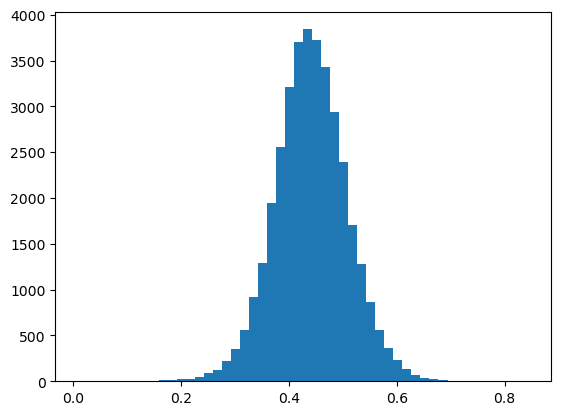

In [28]:
plt.hist(pred, bins = 50)
plt.show()

# Out-Sample Prediction and Backtesting

In [29]:
test_s = (test - mu) / std

In [30]:
model.evaluate(test_s[cols], test["dir"])

592/592 [==============================] - 2s 4ms/step - loss: 0.7111 - accuracy: 0.5136


[0.7110550403594971, 0.5136135220527649]

In [31]:
pred = model.predict(test_s[cols])

592/592 [==============================] - 1s 2ms/step


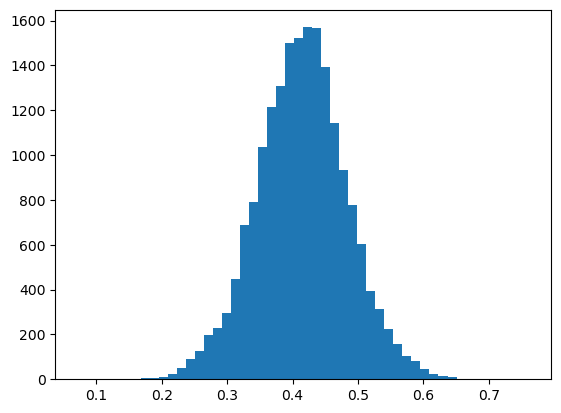

In [32]:
plt.hist(pred, bins = 50);

In [33]:
test["proba"] = model.predict(test_s[cols])

592/592 [==============================] - 1s 2ms/step


In [34]:
# short where proba < 0.47
test["position"] = np.where(test.proba < 0.47, -1, np.nan)

In [35]:
# long where proba > 0.53
test["position"] = np.where(test.proba > 0.53, 1, test.position)

In [36]:
test.index = test.index.tz_localize("UTC")
test["NYTime"] = test.index.tz_convert("America/New_York")
test["hour"] = test.NYTime.dt.hour

In [37]:
# neutral in non-busy hours
test["position"] = np.where(~test.hour.between(2, 12), 0, test.position)

In [38]:
test.position.value_counts(dropna = False)

 0.0    10236
-1.0     7220
 NaN     1053
 1.0      406
Name: position, dtype: int64

In [39]:
# in all other cases: hold position
test["position"] = test.position.ffill()

In [40]:
test.position.value_counts(dropna = False)

 0.0    10284
-1.0     8107
 1.0      524
Name: position, dtype: int64

In [41]:
test["strategy"] = test["position"] * test["returns"]

In [42]:
test["creturns"] = test["returns"].cumsum().apply(np.exp)
test["cstrategy"] = test["strategy"].cumsum().apply(np.exp)

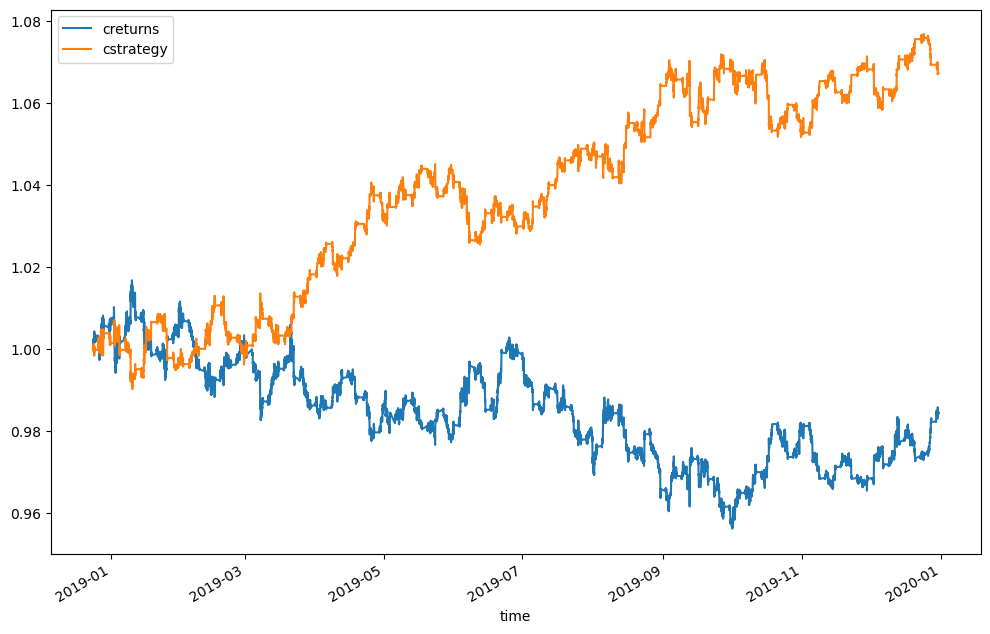

In [43]:
test[["creturns", "cstrategy"]].plot(figsize = (12,8))
plt.show()

In [44]:
# proportionate trading cost
ptc = 0.000059

In [45]:
test["trades"] = test.position.diff().abs()

In [46]:
test.trades.value_counts()

0.0    17827
2.0      561
1.0      526
Name: trades, dtype: int64

In [47]:
test["strategy_net"] = test.strategy - test.trades * ptc

In [48]:
test["cstrategy_net"] = test["strategy_net"].cumsum().apply(np.exp)

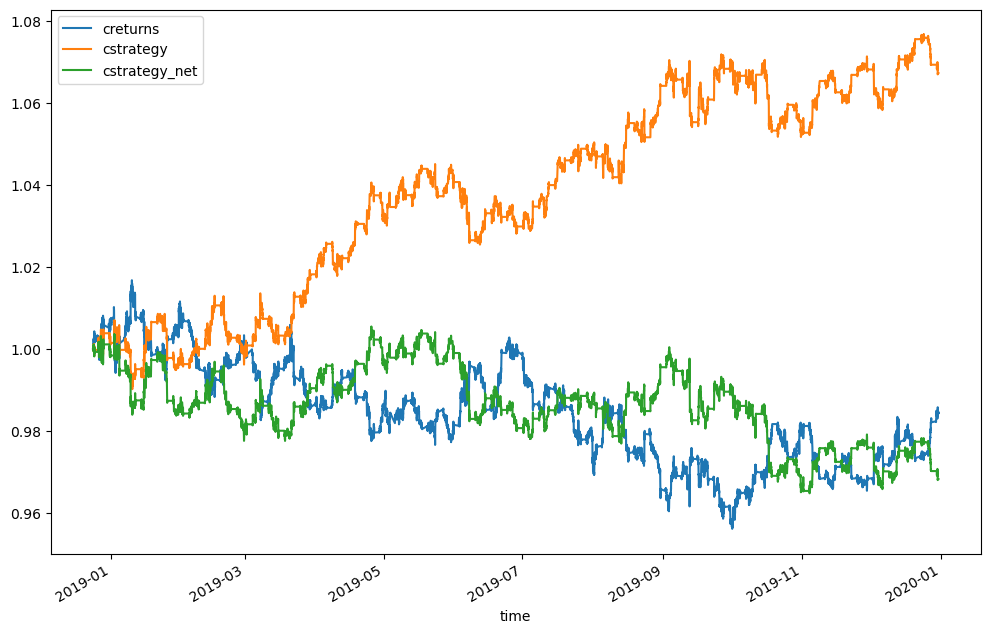

In [49]:
test[["creturns", "cstrategy", "cstrategy_net"]].plot(figsize = (12, 8))
plt.show()

# Saving Model and Parameters

In [50]:
model

In [51]:
mu

EUR_USD         1.156186
returns         0.000002
dir             0.493137
sma             0.000137
boll         -982.825562
min            -0.002536
max             0.002411
mom             0.000002
vol             0.000512
dir_lag_1       0.493137
dir_lag_2       0.493137
dir_lag_3       0.493109
dir_lag_4       0.493082
dir_lag_5       0.493082
sma_lag_1       0.000137
sma_lag_2       0.000138
sma_lag_3       0.000138
sma_lag_4       0.000138
sma_lag_5       0.000138
boll_lag_1   -982.823724
boll_lag_2   -982.822928
boll_lag_3   -982.822905
boll_lag_4   -982.823415
boll_lag_5   -982.824370
min_lag_1      -0.002536
min_lag_2      -0.002537
min_lag_3      -0.002537
min_lag_4      -0.002537
min_lag_5      -0.002537
max_lag_1       0.002411
max_lag_2       0.002410
max_lag_3       0.002410
max_lag_4       0.002410
max_lag_5       0.002410
mom_lag_1       0.000002
mom_lag_2       0.000002
mom_lag_3       0.000002
mom_lag_4       0.000002
mom_lag_5       0.000002
vol_lag_1       0.000512


In [52]:
std

EUR_USD         0.051209
returns         0.000542
dir             0.499960
sma             0.002872
boll          515.755221
min             0.002368
max             0.002249
mom             0.000308
vol             0.000178
dir_lag_1       0.499960
dir_lag_2       0.499960
dir_lag_3       0.499959
dir_lag_4       0.499959
dir_lag_5       0.499959
sma_lag_1       0.002872
sma_lag_2       0.002872
sma_lag_3       0.002872
sma_lag_4       0.002872
sma_lag_5       0.002872
boll_lag_1    515.757327
boll_lag_2    515.758256
boll_lag_3    515.758285
boll_lag_4    515.757677
boll_lag_5    515.756539
min_lag_1       0.002369
min_lag_2       0.002369
min_lag_3       0.002369
min_lag_4       0.002369
min_lag_5       0.002370
max_lag_1       0.002249
max_lag_2       0.002249
max_lag_3       0.002249
max_lag_4       0.002248
max_lag_5       0.002248
mom_lag_1       0.000308
mom_lag_2       0.000308
mom_lag_3       0.000308
mom_lag_4       0.000308
mom_lag_5       0.000308
vol_lag_1       0.000178


In [53]:
model.save("DNN_model")


systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

INFO:tensorflow:Assets written to: DNN_model/assets


INFO:tensorflow:Assets written to: DNN_model/assets


In [54]:
import pickle

In [55]:
params = {"mu":mu, "std":std}

In [56]:
pickle.dump(params, open("params.pkl", "wb"))

# Implementations

In [57]:
import tpqoa
import fxcmpy
from datetime import datetime, timedelta
import time

ModuleNotFoundError: No module named 'tpqoa'

In [60]:
# loading model
import keras
model = keras.models.load_model("DNN_model")

In [61]:
model

In [62]:
params = pickle.load(open("params.pkl", "rb"))
mu = params["mu"]
std = params["std"]

In [63]:
mu

EUR_USD         1.156186
returns         0.000002
dir             0.493137
sma             0.000137
boll         -982.825562
min            -0.002536
max             0.002411
mom             0.000002
vol             0.000512
dir_lag_1       0.493137
dir_lag_2       0.493137
dir_lag_3       0.493109
dir_lag_4       0.493082
dir_lag_5       0.493082
sma_lag_1       0.000137
sma_lag_2       0.000138
sma_lag_3       0.000138
sma_lag_4       0.000138
sma_lag_5       0.000138
boll_lag_1   -982.823724
boll_lag_2   -982.822928
boll_lag_3   -982.822905
boll_lag_4   -982.823415
boll_lag_5   -982.824370
min_lag_1      -0.002536
min_lag_2      -0.002537
min_lag_3      -0.002537
min_lag_4      -0.002537
min_lag_5      -0.002537
max_lag_1       0.002411
max_lag_2       0.002410
max_lag_3       0.002410
max_lag_4       0.002410
max_lag_5       0.002410
mom_lag_1       0.000002
mom_lag_2       0.000002
mom_lag_3       0.000002
mom_lag_4       0.000002
mom_lag_5       0.000002
vol_lag_1       0.000512


In [64]:
std

EUR_USD         0.051209
returns         0.000542
dir             0.499960
sma             0.002872
boll          515.755221
min             0.002368
max             0.002249
mom             0.000308
vol             0.000178
dir_lag_1       0.499960
dir_lag_2       0.499960
dir_lag_3       0.499959
dir_lag_4       0.499959
dir_lag_5       0.499959
sma_lag_1       0.002872
sma_lag_2       0.002872
sma_lag_3       0.002872
sma_lag_4       0.002872
sma_lag_5       0.002872
boll_lag_1    515.757327
boll_lag_2    515.758256
boll_lag_3    515.758285
boll_lag_4    515.757677
boll_lag_5    515.756539
min_lag_1       0.002369
min_lag_2       0.002369
min_lag_3       0.002369
min_lag_4       0.002369
min_lag_5       0.002370
max_lag_1       0.002249
max_lag_2       0.002249
max_lag_3       0.002249
max_lag_4       0.002248
max_lag_5       0.002248
mom_lag_1       0.000308
mom_lag_2       0.000308
mom_lag_3       0.000308
mom_lag_4       0.000308
mom_lag_5       0.000308
vol_lag_1       0.000178


# [Oanda] Implementation

In [ ]:
class DNNTrader(tpqoa.tpqoa):
    def __init__(self, conf_file, instrument, bar_length, window, lags, model, mu, std, units):
        super()._init__(cof_file)
        self.instrument = instrument
        self.bar_length = pd.to_timedelta(bar_length)
        self.tick_data = pd.DataFrame()